In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DIR = "E:/datasets/numerai_data/numerai_dataset_250"

In [20]:
df_train = pd.read_csv(os.path.join(DIR, "numerai_training_data.csv"))

In [21]:
df_train.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,...,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.50
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,...,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,...,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.25
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,...,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.25
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,...,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75


In [22]:
df_train.target.unique()

array([0.5 , 0.25, 0.75, 0.  , 1.  ])

In [23]:
features = [c for c in df_train if c.startswith("feature")]

In [24]:
df_train[features].head()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46
0,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,...,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75
1,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,...,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00
2,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,...,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75
3,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,...,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00
4,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,...,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75


In [25]:
erano = df_train.era.str.slice(3).astype(int)
erano.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120], dtype=int64)

In [26]:
def numerai_score(y_true, y_pred):
    rank_pred = y_pred.groupby(eras).apply(lambda x: x.rank(pct=True, method="first"))
    return numpy.corrcoef(y_true, rank_pred)[0,1]

# It can also be convenient while working to evaluate based on the regular (pearson) correlation
def correlation_score(y_true, y_pred):
    return numpy.corrcoef(y_true, y_pred)[0,1]

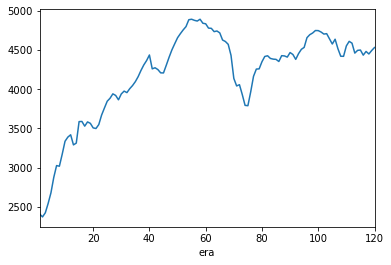

In [27]:
df_train.groupby(erano).size().plot()

In [28]:
feature_corrs = df_train[features].corr()
feature_corrs.stack().head()

feature_intelligence1  feature_intelligence1    1.000000
                       feature_intelligence2   -0.014157
                       feature_intelligence3   -0.024404
                       feature_intelligence4    0.652596
                       feature_intelligence5    0.069868
dtype: float64